In [3]:
!pip install utils
!pip install netCDF4 
!pip install scipy
!pip install "xarray[io]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 4.0 MB/s 
     |████████████████████████████████| 19.3 MB 5.7 MB/s 
     |████████████████████████████████| 185 kB 54.4 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 114 kB 32.4 MB/s 
     |████████████████████████████████| 6.6 MB 25.9 MB/s 
  Created wheel for eccodes: filename=eccodes-1.5.0-py3-none-any.whl size=39664 sha256=2b16d1dc6a698f8021887f562deb0cd8dd333e364c86f7e7c7f5599a620cbcd7
  Stored in directory: /root/.cache/pip/wheels/1f/4

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import netCDF4 as nc
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
path5 = ('/content/drive/MyDrive/Multivariate Data Independent Study/ERA5_meteo_sfc_2021_daily.nc')
data5 = xr.open_dataset(path5)

In [11]:
def transformdm1(x):
  import dask.dataframe
# Transforming Data
  dask_df = x.to_dask_dataframe(dim_order=None, set_index=False)
  dd = dask_df.compute()
  sst_data_trans = pd.DataFrame()
  #t2m_data_trans = pd.DataFrame()

  for i in range(0,dd.shape[0]):
    b=('sst'+'('+str(dd.latitude[i])+','+str(dd.longitude[i])+')')
   #c=('t2m'+'('+str(dd.lat[i])+','+str(dd.lon[i])+')')

    sst_data_trans.loc[dd.time[i], b] = dd.sst[i]
    #t2m_data_trans.loc[dd.time[i], c] = dd.t2m[i]

#Concating the variables 
  trans_concat = pd.concat([sst_data_trans]) #],,t2m_data_trans axis=1)
  return trans_concat

In [12]:
datat5=transformdm1(data5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


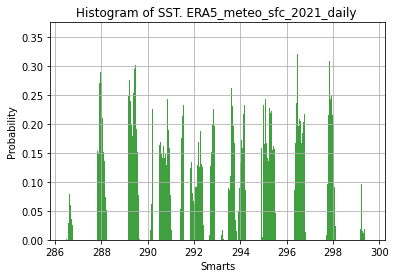

In [13]:

# the histogram of the data
plt.hist(datat5,density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of SST. ERA5_meteo_sfc_2021_daily ')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


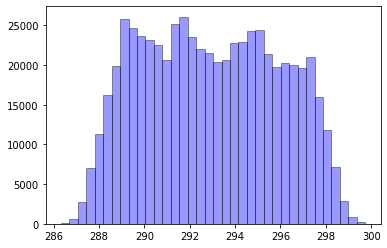

In [15]:
# seaborn histogram
sns.distplot(datat5, hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})